In [33]:
import pandas as pd
import matplotlib 
import numpy as np
import matplotlib.pyplot as plt
from joblib import dump
from sklearn.ensemble import IsolationForest

In [19]:
X_train = pd.read_csv("train.csv")
X_test = pd.read_csv("test.csv")

In [3]:
model = IsolationForest(random_state=16)

In [4]:
clf = model.fit(X_train)


## Print the boundary

The main idea behind the visualization involves generating many points covering the range of both features of the training set and predicting the anomaly scores of these generated points with the decision_function() function (note that I named my model variable clf; yours might have a different name). After predicting, we then draw the generated points using Matplotlib’s contour plot to see the “ripples” (the different boundary levels). After drawing it, you will see a “hard” boundary in red and “soft” boundaries in different shades of blue. Make sure you also add the training set (I named mine X_train; yours might have a different name) to the plot using plt.scatter()

In [7]:
def plot_model(clf):
    # Change the plot's size.
    plt.rcParams['figure.figsize'] = [15, 15]
    # Plot of the decision frontier
    xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.title("Decision Boundary (base model)")
    # This draw the "soft" or secondary boundaries.
    plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
    # This draw the line that separates the hard from the soft boundaries.
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
    # This draw the hard boundary
    plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
    plt.scatter(X_train.iloc[:, 0],
                X_train.iloc[:, 1],
                edgecolors='k')
    plt.xlabel('Mean')
    plt.ylabel('SD')
    plt.grid(True)
    plt.show()

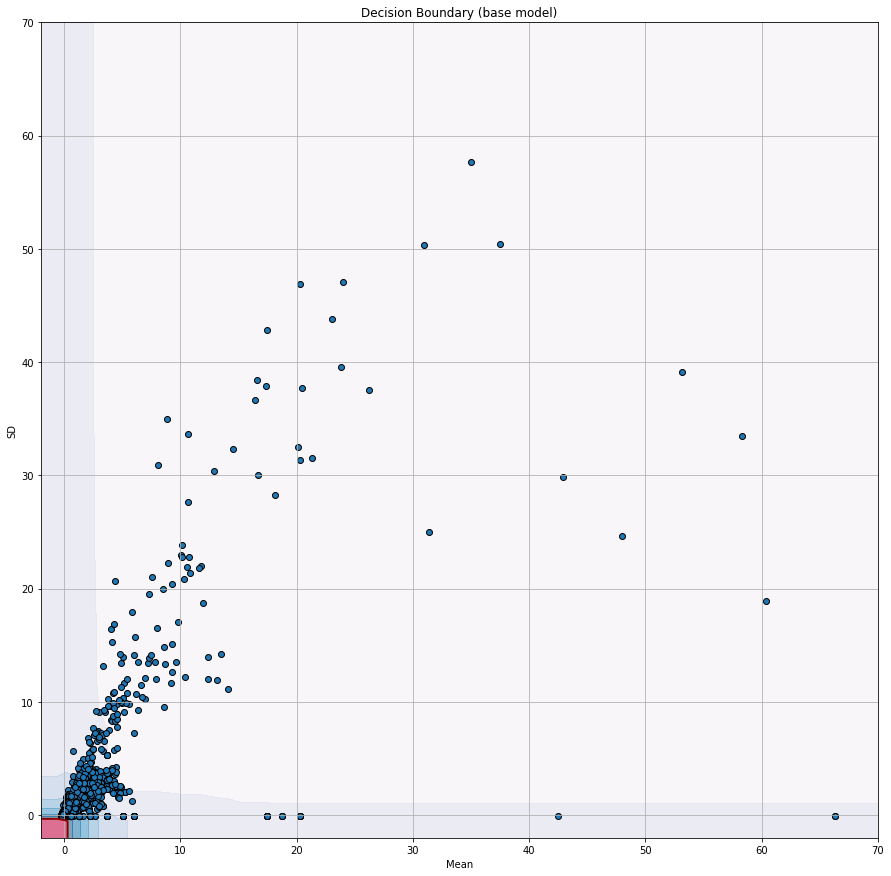

In [12]:
clf = IsolationForest(n_estimators = 100, random_state=16).fit(X_train)
plot_model(clf)

## Observation
Let’s take this milestone step to interpret what we see here. The plot you have on screen is the decision boundary of the isolation forest. Everything within the red region is what I call the “hard” decision boundary. It contains the inliers or normal points. The rest are the outliers or anomalies. Here, we can barely see the red region—it is extremely small compared to the rest of the space. Yet, it contains most of the points (around 85%) of the training dataset. However, the remaining 15% is still a lot of data, and probably many of these points are data points that aren’t that extremely anomalous or points that might be even false positives. So, for this case, it would be wise to increase the decision boundary’s size, thus also reducing the points that would be classified as outliers. How? By using the contamination hyperparameter. See note 1 in the notes section below

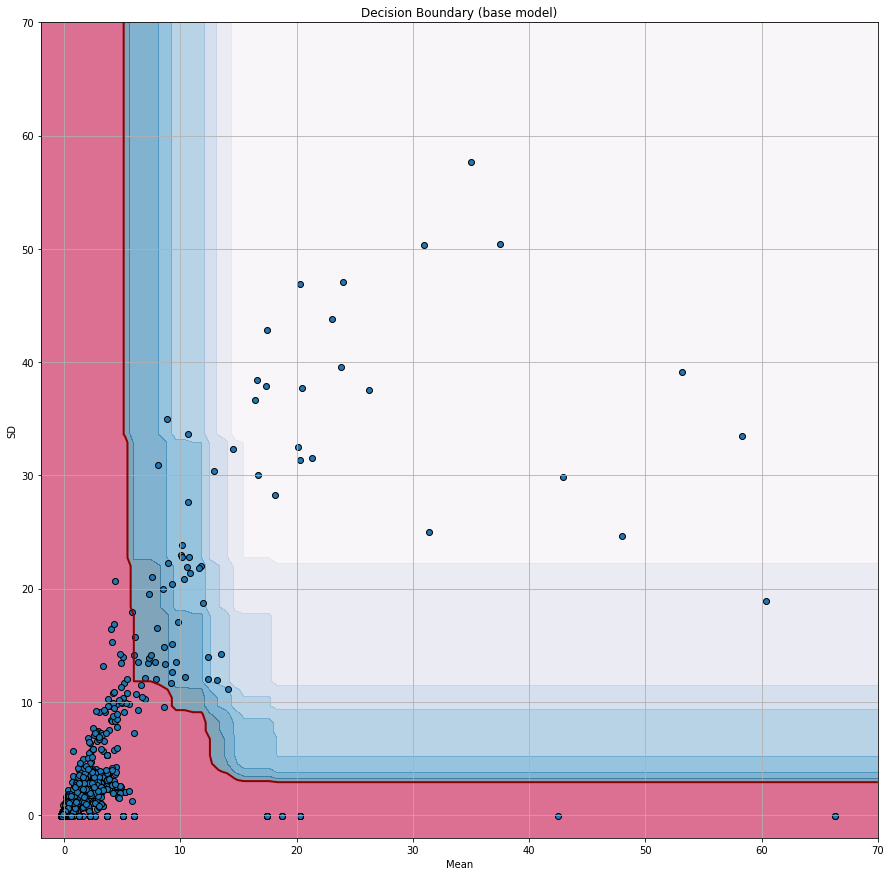

In [18]:
clf = IsolationForest(n_estimators = 100, contamination=0.001 , random_state=16).fit(X_train)
plot_model(clf)

In [28]:
test_predictions = clf.predict(X_test)

In [31]:
df_predictions = pd.concat([X_test, pd.Series(test_predictions)], axis=1)
df_predictions.columns = ['mean', 'sd', 'output']

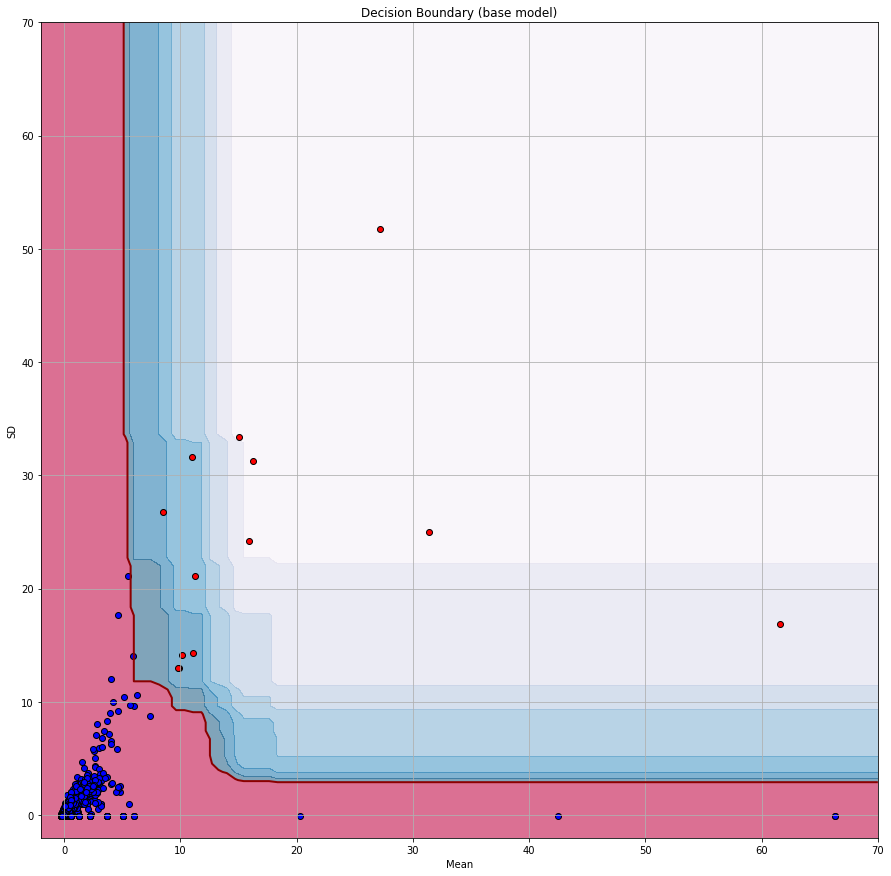

In [32]:
# Change the plot's size.
plt.rcParams['figure.figsize'] = [15, 15]
# Plot of the decision frontier
xx, yy = np.meshgrid(np.linspace(-2, 70, 100), np.linspace(-2, 70, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.title("Decision Boundary (base model)")
# This draw the "soft" or secondary boundaries.
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 8), cmap=plt.cm.PuBu, alpha=0.5)
# This draw the line that separates the hard from the soft boundaries.
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
# This draw the hard boundary
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')
# plt.scatter(X_train.iloc[:, 0],
#             X_train.iloc[:, 1],
#             edgecolors='k')
plt.scatter(df_predictions[df_predictions['output'] == 1 ].iloc[:, 0],
             df_predictions[df_predictions['output'] == 1 ].iloc[:, 1],
             c='blue', edgecolors='k')

plt.scatter(df_predictions[df_predictions['output'] == -1 ].iloc[:, 0],
             df_predictions[df_predictions['output'] == -1 ].iloc[:, 1],
             c='red', edgecolors='k')

plt.xlabel('Mean')
plt.ylabel('SD')
plt.grid(True)
plt.show()

In [ ]:

dump(clf, 'model.joblib') 